In [1]:
import pandas as pd
import pickle
import json
import tweepy
import time
import numpy as np
import re
import networkx as nx
import wget
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
import csv
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from textblob import TextBlob 
import matplotlib.pyplot as plt
import seaborn as sns



## tweets sentiment analysis 

## read the pickle file, steps are shown in the other jupyter notebook. 

In [2]:
with open('tweetfile2.p', 'rb') as fp:
    completelocation = pickle.load(fp)
with open('locationtokenized.p', 'rb') as fp:
    countrybased = pickle.load(fp)
with open('tweetstring.p', 'rb') as fp:
    locationstring = pickle.load(fp)
with open('locationstring.p', 'rb') as fp:
    countrystring = pickle.load(fp)

In [3]:
#with open('completelocation.p', 'rb') as fp:
#    pd1 = pickle.load(fp)
#with open('countrytweets.p', 'rb') as fp:
#    pd2 = pickle.load(fp)

### dataframe with each individule tweets

In [4]:
completelocation.head()

tweet location      created
0   [well, looking, like, amy, coney, barrett, ann...       US  02-Oct-2020
1   [wapo, deleted, tweet, wa, sent, hour, trump, ...       US  02-Oct-2020
8   [tree4justice, real, thing, nurse, friend, see...       US  02-Oct-2020
9   [covid19, officially, denounces, white, suprem...       US  02-Oct-2020
11  [statement, president, trump, covid19, diagnosis]   CANADA  02-Oct-2020

In [5]:
locationstring.head()


tweet location      created
0   well looking like amy coney barrett announceme...       US  02-Oct-2020
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020
9        covid19 officially denounces white supremacy       US  02-Oct-2020
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020

### group tweets together based on location for sentiment analysis 

In [6]:
countrybased.head()

tweet
location                                                    
ARGENTINA  [statement, trump, covid19, positive, diagnosi...
AUSTRALIA  [coronavirus, ultimate, trap, medium, loselose...
BELGIUM    [kary, mullis, invented, pcr, nobel, prize, ch...
BRAZIL     [alarming, data, show, third, wave, covid19, h...
CANADA     [statement, president, trump, covid19, diagnos...

In [7]:
countrystring.head()

tweet
location                                                    
ARGENTINA  statement trump covid19 positive diagnosis“ yo...
AUSTRALIA  coronavirus ultimate trap medium loselose play...
BELGIUM    kary mullis invented pcr nobel prize chemistry...
BRAZIL     alarming data show third wave covid19 hitpresi...
CANADA     statement president trump covid19 diagnosis“ w...

### choose sample size

In [8]:
def samplesize(pd,n):
    country=dict()
    rownum=len(pd.index)
    print(rownum)
    validnum=int(round(rownum*n,0))
    print(validnum)
    pd=pd.groupby("location").filter(lambda x: len(x) > validnum)
    return pd.location.value_counts()

In [9]:
samplesize(completelocation,0.005)

87377
437


US                61516
UNITED KINGDOM     9931
CANADA             4501
NIGERIA            2771
AUSTRALIA          1711
INDIA              1673
IRELAND             859
Name: location, dtype: int64

### aggregated tweets from top countries 

In [10]:
countrybased
countrybased.loc[['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND']]


#countrybased.loc[countrybased['location'] == 'US']

tweet
location                                                         
US              [well, looking, like, amy, coney, barrett, ann...
UNITED KINGDOM  [incredible, number, friday, 2, october, confi...
CANADA          [statement, president, trump, covid19, diagnos...
NIGERIA         [field, wave, idk, course, cursed, 😭😭😭, lectur...
AUSTRALIA       [coronavirus, ultimate, trap, medium, loselose...
INDIA           [5, surbhi, chandna, say, update, fan, health,...
IRELAND         [right, thing, friend, loved, dublin, teenager...

In [11]:
selectedcountry=countrystring.loc[['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND']]

In [13]:
selectedcountry

tweet
location                                                         
US              well looking like amy coney barrett announceme...
UNITED KINGDOM  incredible number friday 2 october confirm awa...
CANADA          statement president trump covid19 diagnosis“ w...
NIGERIA         field wave idk course cursed 😭😭😭 lecturer set ...
AUSTRALIA       coronavirus ultimate trap medium loselose play...
INDIA           5 surbhi chandna say update fan health sharad ...
IRELAND         right thing friend loved dublin teenager told ...

### stopwords and word count

In [15]:
stop_words = text.ENGLISH_STOP_WORDS

In [16]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(selectedcountry.tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = selectedcountry.index
data_dtm

00  000  0000000000  0000005  0000049  0001  00012  0002  \
location                                                                   
US               2    2           0        1        0     0      1     1   
UNITED KINGDOM   1    1           0        0        8     5      0     0   
CANADA           1    1           0        0        0     0      0     0   
NIGERIA          0    0           0        0        0     0      0     0   
AUSTRALIA        0    1           1        0        0     0      0     0   
INDIA            4    0           0        0        0     0      0     0   
IRELAND          0    1           0        0        0     0      0     0   

                0003  0006  ...  𝗱𝗶𝗱  𝗵𝗮𝘃𝗲  𝗸𝗻𝗼𝘄  𝗺𝗼𝗿𝗲  𝗼𝗿  𝘀𝗼𝗺𝗲𝗼𝗻𝗲  𝘄𝗵𝗼  𝘆𝗼𝘂  \
location                    ...                                                 
US                 0     2  ...    1     1     1     1   1        1    1    1   
UNITED KINGDOM     0     0  ...    0     0     0     0   0        0    0    0   
CANADA             1     0  ...    0     0     0     0   0        0    0    0   
NIGERIA            0     0  ...    0     0     0     0   0        0    0    0   
AUSTRALIA          0     0  ...    1     1     1     1   1        1    1    1   
INDIA              0     0  ...    0     0     0     0   0        0    0    0   
IRELAND            0     0  ...    0     0     0     0   0        0    0    0   

                𝙎𝙀𝙉𝙄𝙊𝙍  𝙎𝙋𝙊𝙏𝙇𝙄𝙂𝙃𝙏  
location                           
US                   1          1  
UNITED KINGDOM       0          0  
CANADA               0          0  
NIGERIA              0          0  
AUSTRALIA            0          0  
INDIA                0          0  
IRELAND              0          0  

[7 rows x 78977 columns]

In [17]:
datanew=data_dtm.transpose()

### top 100 frequent words store in top_dict dictionary

In [171]:
top_dict = {}
for c in datanew.columns:
    top = datanew[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))


In [19]:
words = []
for country in datanew.columns:
    top = [word for (word, count) in top_dict[country]]
    for t in top:
        words.append(t)
Counter(words).most_common()

[('covid', 7),
 ('covid19', 7),
 ('case', 7),
 ('wa', 7),
 ('people', 7),
 ('death', 7),
 ('amp', 7),
 ('day', 7),
 ('say', 7),
 ('like', 7),
 ('test', 7),
 ('tested', 7),
 ('make', 7),
 ('month', 7),
 ('news', 7),
 ('country', 7),
 ('trump', 6),
 ('new', 6),
 ('dont', 6),
 ('positive', 6),
 ('pandemic', 6),
 ('state', 6),
 ('mask', 6),
 ('today', 6),
 ('time', 6),
 ('year', 6),
 ('health', 6),
 ('coronavirus', 6),
 ('need', 6),
 ('doctor', 6),
 ('think', 6),
 ('number', 6),
 ('way', 6),
 ('vaccine', 6),
 ('world', 6),
 ('good', 6),
 ('government', 6),
 ('died', 5),
 ('million', 5),
 ('said', 5),
 ('week', 5),
 ('know', 5),
 ('hospital', 5),
 ('family', 5),
 ('going', 5),
 ('let', 5),
 ('life', 5),
 ('right', 5),
 ('dr', 5),
 ('virus', 5),
 ('patient', 5),
 ('help', 5),
 ('home', 5),
 ('school', 5),
 ('work', 5),
 ('public', 5),
 ('lockdown', 5),
 ('19', 5),
 ('president', 4),
 ('house', 4),
 ('got', 4),
 ('doesnt', 4),
 ('flu', 4),
 ('free', 4),
 ('really', 4),
 ('getting', 4),
 ('spr

### add additional stop words 
### common words that appear in more than two countries

In [20]:
add_stop_words=[word for word, count in Counter(words).most_common() if count > 2]
add_stop_words.extend(('https','thing','youre','nh','bc','isnt','amp'))
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

### US top words frequency

In [21]:
freqUS=pd.DataFrame(top_dict['US'])
freqUS.columns=['word', 'count']
freqUS
freqUS = freqUS[~freqUS['word'].isin(stop_words)]


In [22]:
fig = px.bar(freqUS, x='word', y="count")
fig.show()

In [23]:
fig = px.pie(
    freqUS.head(30), 
    values='count', 
    names='word', 
    title="Top 30 Word Count of US's Tweets")
fig.show()

## generate word cloud for top 7 countries


In [25]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=150, collocations=False,random_state=12)

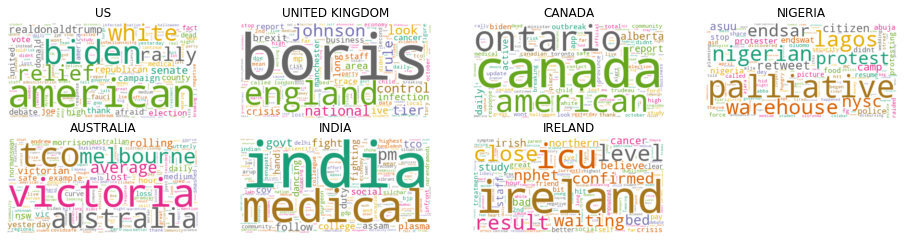

In [26]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

cname = ['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND']

# Create subplots for each comedian
for index, country in enumerate(datanew.columns):
    wc.generate(selectedcountry.tweet[country])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(cname[index])
    
plt.show()

## covid rates and tweets analysis
### read in grouped_rates.csv, code for rates in another jupyter notebook

In [27]:
covidrates=pd.read_csv('grouped_rates.csv')

In [28]:
covidrates['Country/Region'] = covidrates['Country/Region'].str.upper()

In [172]:
covidrates.head()

Unnamed: 0 Country/Region  Population  confirmed per  mortality rate  \
0           0    AFGHANISTAN  39009447.0       0.001030        0.037101   
1           1        ALBANIA   2877470.0       0.005864        0.026410   
2           2        ALGERIA  43926079.0       0.001236        0.033966   
3           3        ANDORRA     77278.0       0.043023        0.019083   
4           4         ANGOLA  32956300.0       0.000228        0.032158   

   recover rate  
0      0.834163  
1      0.587116  
2      0.699213  
3      0.670784  
4      0.409617

### merge tweets with grouped rate table

In [30]:
covidmerge=pd.merge(countrystring, covidrates, left_index=True, right_on='Country/Region')


In [31]:
covidmerge
covidmerge = covidmerge[['Country/Region','tweet','confirmed per','mortality rate','recover rate']]


In [32]:
covidmerge.head()

Country/Region                                              tweet  \
6       ARGENTINA  statement trump covid19 positive diagnosis“ yo...   
8       AUSTRALIA  coronavirus ultimate trap medium loselose play...   
16        BELGIUM  kary mullis invented pcr nobel prize chemistry...   
23         BRAZIL  alarming data show third wave covid19 hitpresi...   
30         CANADA  statement president trump covid19 diagnosis“ w...   

    confirmed per  mortality rate  recover rate  
6        0.021338        0.026571      0.809035  
8        0.000134        0.020164      0.934482  
16       0.019571        0.053049      0.106901  
23       0.000904        0.026102      0.868797  
30       0.000374        0.018541      0.800985

### get sentiment scores

In [33]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity



covidmerge['Subjectivity'] = covidmerge['tweet'].apply(getTextSubjectivity)
covidmerge['Polarity'] = covidmerge['tweet'].apply(getTextPolarity)


In [34]:
covidmerge.head()


Country/Region                                              tweet  \
6       ARGENTINA  statement trump covid19 positive diagnosis“ yo...   
8       AUSTRALIA  coronavirus ultimate trap medium loselose play...   
16        BELGIUM  kary mullis invented pcr nobel prize chemistry...   
23         BRAZIL  alarming data show third wave covid19 hitpresi...   
30         CANADA  statement president trump covid19 diagnosis“ w...   

    confirmed per  mortality rate  recover rate  Subjectivity  Polarity  
6        0.021338        0.026571      0.809035      0.395347  0.081253  
8        0.000134        0.020164      0.934482      0.458426  0.078438  
16       0.019571        0.053049      0.106901      0.482772  0.078209  
23       0.000904        0.026102      0.868797      0.431975  0.034584  
30       0.000374        0.018541      0.800985      0.450369  0.056252

In [35]:
covidmergeselect=covidmerge.copy()

### correlation among variabled

In [36]:
covidmergeselect=covidmergeselect.loc[covidmergeselect['Country/Region'].isin(['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND'])]
corr=covidmergeselect.corr()
print(corr)
plt.show()

                confirmed per  mortality rate  recover rate  Subjectivity  \
confirmed per        1.000000        0.775242     -0.191147      0.281056   
mortality rate       0.775242        1.000000     -0.316050      0.357870   
recover rate        -0.191147       -0.316050      1.000000     -0.188129   
Subjectivity         0.281056        0.357870     -0.188129      1.000000   
Polarity            -0.191970       -0.388056      0.496399      0.531763   

                Polarity  
confirmed per  -0.191970  
mortality rate -0.388056  
recover rate    0.496399  
Subjectivity    0.531763  
Polarity        1.000000  


In [37]:
covidmergeselect


Country/Region                                              tweet  \
8         AUSTRALIA  coronavirus ultimate trap medium loselose play...   
30           CANADA  statement president trump covid19 diagnosis“ w...   
72            INDIA  5 surbhi chandna say update fan health sharad ...   
76          IRELAND  right thing friend loved dublin teenager told ...   
116         NIGERIA  field wave idk course cursed 😭😭😭 lecturer set ...   
166  UNITED KINGDOM  incredible number friday 2 october confirm awa...   
163              US  well looking like amy coney barrett announceme...   

     confirmed per  mortality rate  recover rate  Subjectivity  Polarity  
8         0.000134        0.020164      0.934482      0.458426  0.078438  
30        0.000374        0.018541      0.800985      0.450369  0.056252  
72        0.000144        0.011223      0.821958      0.443902  0.087458  
76        0.009759        0.039337      0.498596      0.458476  0.045348  
116       0.000295        0.018418      0.890932      0.377471  0.028489  
166       0.000697        0.032782      0.622221      0.455125  0.050638  
163       0.000007        0.020830      0.000000      0.439607  0.034215

In [165]:
newt=pd.read_csv('covid_tweets_grouped_sentiment.csv')

In [166]:
newt['new_countries'] = newt['new_countries'].str.upper() 

newt=newt.set_index(['new_countries'])

In [167]:
newt.head()

compound
new_countries               
AFGHANISTAN         0.000000
ALBANIA             0.000000
ANGOLA              0.000000
ANTIGUA ANDBARBUDA -0.381800
ARGENTINA           0.033785

In [168]:
#newt.merge(covidrates, left_on='new_countries',right_on='Country/Region')
newt=pd.merge(newt, covidrates, left_index=True, right_on='Country/Region')

In [169]:
newt=newt[['Country/Region','confirmed per','mortality rate','recover rate','compound']]

### correlation between covid rates and compound sentiment score

                confirmed per  mortality rate  recover rate  compound
confirmed per        1.000000        0.071333      0.216142  0.243465
mortality rate       0.071333        1.000000     -0.047805 -0.194336
recover rate         0.216142       -0.047805      1.000000  0.132065
compound             0.243465       -0.194336      0.132065  1.000000


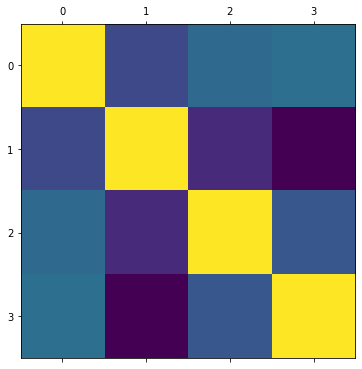

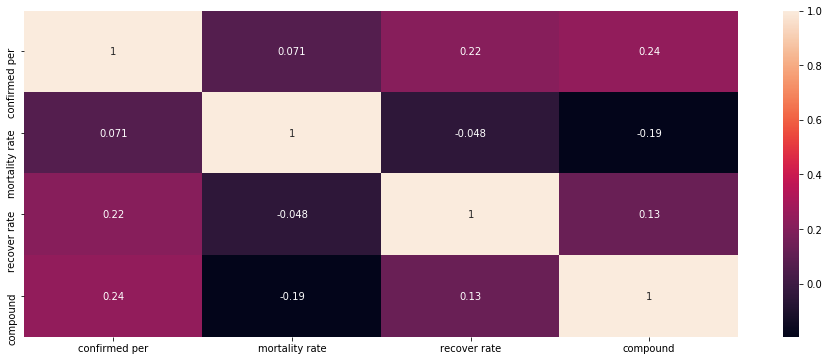

In [188]:
corr=newt.corr()
print(corr)
plt.matshow(newt.corr())
plt.show()
sns.heatmap(corr, annot=True)
plt.show()

In [39]:
tweetsent=locationstring.copy()


### pickle and read it

In [41]:
#with open('tweetsentiment.p', 'wb') as fp:
    #pickle.dump(tweetsent, fp, protocol=pickle.HIGHEST_PROTOCOL)


In [42]:
with open('tweetsentiment.p', 'rb') as fp:
    tweetsentp = pickle.load(fp)



### get average polarity from each country

In [43]:
tweetsentp.head()

tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
9        covid19 officially denounces white supremacy       US  02-Oct-2020   
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020   

    Subjectivity  Polarity  
0       0.808333  0.466667  
1       0.333333  0.250000  
8       0.300000  0.200000  
9       0.000000  0.000000  
11      0.000000  0.000000

In [44]:
tweetsentp.loc[tweetsent['location']=='US']['Polarity'].mean()

0.0285496667481818

In [45]:
tweetsentp.head()

tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
9        covid19 officially denounces white supremacy       US  02-Oct-2020   
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020   

    Subjectivity  Polarity  
0       0.808333  0.466667  
1       0.333333  0.250000  
8       0.300000  0.200000  
9       0.000000  0.000000  
11      0.000000  0.000000

In [181]:
t1=tweetsentp.groupby(['location'])[('Polarity','Subjectivity')].mean()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [182]:
covidrates.head()
#t1.head()

Unnamed: 0 Country/Region  Population  confirmed per  mortality rate  \
0           0    AFGHANISTAN  39009447.0       0.001030        0.037101   
1           1        ALBANIA   2877470.0       0.005864        0.026410   
2           2        ALGERIA  43926079.0       0.001236        0.033966   
3           3        ANDORRA     77278.0       0.043023        0.019083   
4           4         ANGOLA  32956300.0       0.000228        0.032158   

   recover rate  
0      0.834163  
1      0.587116  
2      0.699213  
3      0.670784  
4      0.409617

## merge sentiment score with covid country rates

In [183]:
#t1
covidt1=pd.merge(t1, covidrates, left_index=True, right_on='Country/Region')

In [184]:

covidt1 = covidt1[['Country/Region','Polarity','Subjectivity','confirmed per','mortality rate','recover rate']]
covidt1.head()

Country/Region  Polarity  Subjectivity  confirmed per  mortality rate  \
6       ARGENTINA  0.050731      0.190566       0.021338        0.026571   
8       AUSTRALIA  0.061293      0.357927       0.000134        0.020164   
16        BELGIUM  0.119089      0.359264       0.019571        0.053049   
23         BRAZIL  0.008556      0.268205       0.000904        0.026102   
30         CANADA  0.042758      0.342135       0.000374        0.018541   

    recover rate  
6       0.809035  
8       0.934482  
16      0.106901  
23      0.868797  
30      0.800985

### correlation between sentiment scores and tweets

                Polarity  Subjectivity  confirmed per  mortality rate  \
Polarity        1.000000      0.322745       0.369288        0.056569   
Subjectivity    0.322745      1.000000      -0.197936        0.140666   
confirmed per   0.369288     -0.197936       1.000000        0.066539   
mortality rate  0.056569      0.140666       0.066539        1.000000   
recover rate   -0.135061     -0.152036      -0.101388       -0.301648   

                recover rate  
Polarity           -0.135061  
Subjectivity       -0.152036  
confirmed per      -0.101388  
mortality rate     -0.301648  
recover rate        1.000000  


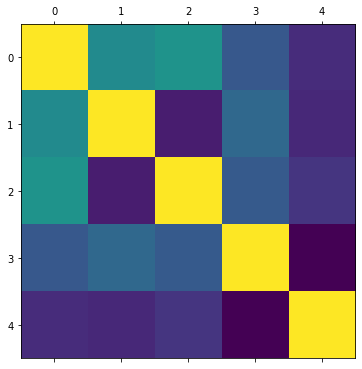

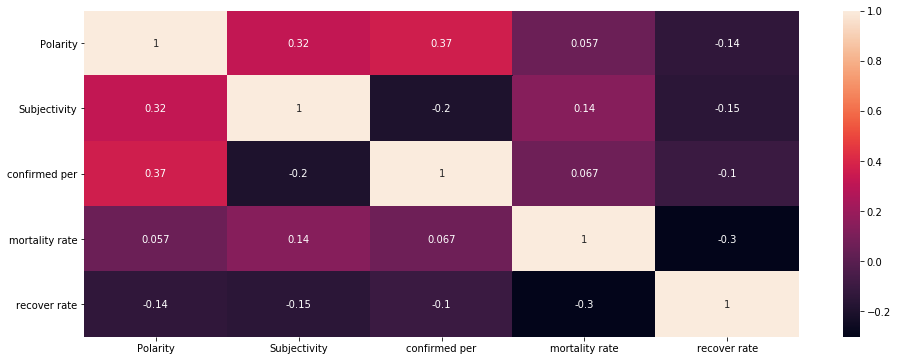

In [189]:
corrcovid=covidt1.corr()
print(corrcovid)
plt.matshow(covidt1.corr())
plt.show()
sns.heatmap(corrcovid, annot=True)
plt.show()

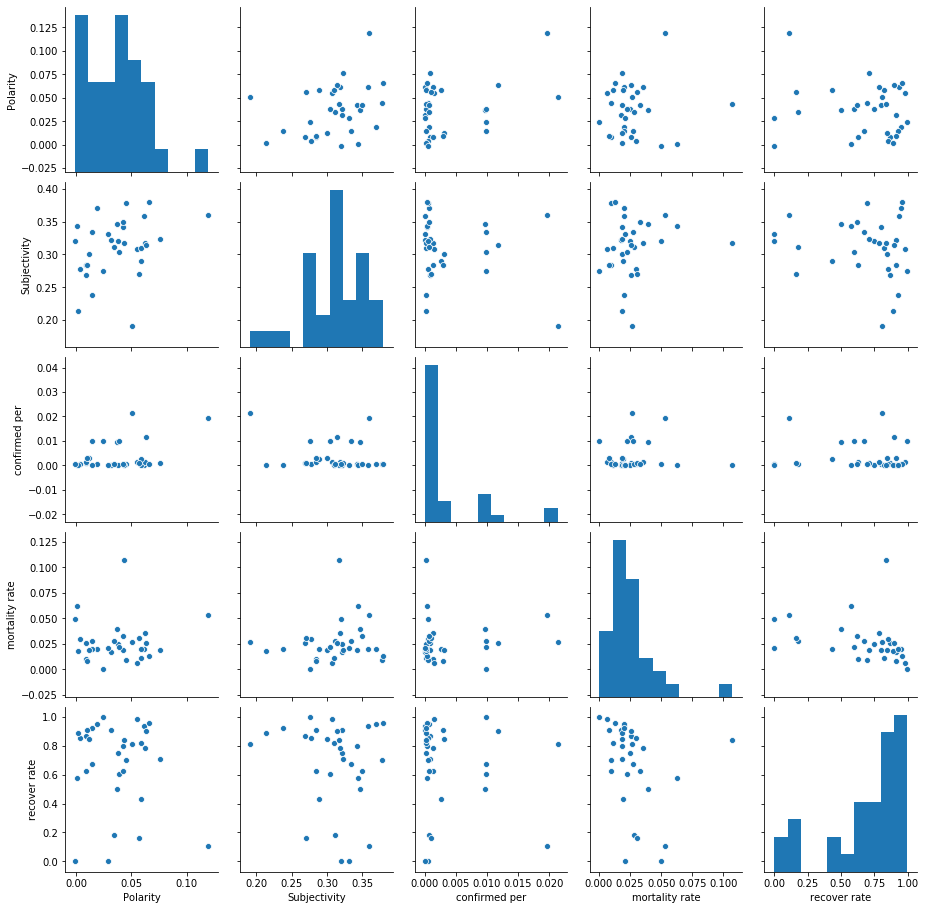

In [190]:
sns.pairplot(covidt1)
plt.show()


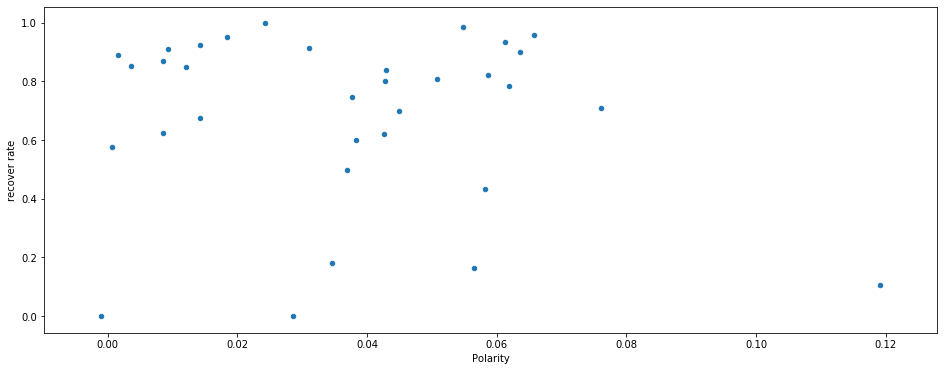

In [191]:
#covid1.plot(kind="scatter",x="")
covidt1.plot(kind='scatter',x='Polarity', y='recover rate')

In [192]:
t1.loc[['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND']]



Polarity  Subjectivity
location                              
US              0.028550      0.331055
UNITED KINGDOM  0.042544      0.349819
CANADA          0.042758      0.342135
NIGERIA         0.001622      0.213120
AUSTRALIA       0.061293      0.357927
INDIA           0.058659      0.309400
IRELAND         0.036900      0.346352

### remove neutral tweets

In [193]:
tweetremove=tweetsentp.copy()
tweetremove = tweetremove[tweetremove.Polarity != 0]
tweetremove.head()


tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
15  artist dropped new song trump covid amp ; full...       US  02-Oct-2020   
16  testing positive covid 19 wearing mask 6 month...       US  02-Oct-2020   

    Subjectivity  Polarity     Score  
0       0.808333  0.466667  Positive  
1       0.333333  0.250000  Positive  
8       0.300000  0.200000  Positive  
15      0.501515  0.328788  Positive  
16      0.547727  0.288636  Positive

In [194]:
t2=tweetremove.groupby(['location'])[('Polarity','Subjectivity')].mean()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [195]:
t2.head()

Polarity  Subjectivity
location                         
ARGENTINA  0.118857      0.442660
AUSTRALIA  0.094907      0.490588
BELGIUM    0.194873      0.503796
BRAZIL     0.018901      0.549667
CANADA     0.068125      0.500669

In [196]:
tweetremove.describe()


Subjectivity      Polarity
count  53049.000000  53049.000000
mean       0.498921      0.052442
std        0.223531      0.311112
min        0.000000     -1.000000
25%        0.337500     -0.125000
50%        0.490909      0.100000
75%        0.625000      0.227273
max        1.000000      1.000000

In [197]:
t2.loc[['US','UNITED KINGDOM','CANADA','NIGERIA','AUSTRALIA','INDIA','IRELAND']]


Polarity  Subjectivity
location                              
US              0.046872      0.500204
UNITED KINGDOM  0.065811      0.500076
CANADA          0.068125      0.500669
NIGERIA         0.003978      0.478378
AUSTRALIA       0.094907      0.490588
INDIA           0.104068      0.482098
IRELAND         0.058373      0.501458

In [198]:
covidmergeselect


Country/Region                                              tweet  \
8         AUSTRALIA  coronavirus ultimate trap medium loselose play...   
30           CANADA  statement president trump covid19 diagnosis“ w...   
72            INDIA  5 surbhi chandna say update fan health sharad ...   
76          IRELAND  right thing friend loved dublin teenager told ...   
116         NIGERIA  field wave idk course cursed 😭😭😭 lecturer set ...   
166  UNITED KINGDOM  incredible number friday 2 october confirm awa...   
163              US  well looking like amy coney barrett announceme...   

     confirmed per  mortality rate  recover rate  Subjectivity  Polarity  
8         0.000134        0.020164      0.934482      0.458426  0.078438  
30        0.000374        0.018541      0.800985      0.450369  0.056252  
72        0.000144        0.011223      0.821958      0.443902  0.087458  
76        0.009759        0.039337      0.498596      0.458476  0.045348  
116       0.000295        0.018418      0.890932      0.377471  0.028489  
166       0.000697        0.032782      0.622221      0.455125  0.050638  
163       0.000007        0.020830      0.000000      0.439607  0.034215

In [199]:
tweetremove.head()

tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
15  artist dropped new song trump covid amp ; full...       US  02-Oct-2020   
16  testing positive covid 19 wearing mask 6 month...       US  02-Oct-2020   

    Subjectivity  Polarity     Score  
0       0.808333  0.466667  Positive  
1       0.333333  0.250000  Positive  
8       0.300000  0.200000  Positive  
15      0.501515  0.328788  Positive  
16      0.547727  0.288636  Positive

### average sentiment for each country

In [201]:
tweetsentp.groupby(['location'])[('Polarity','Subjectivity')].mean().head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Polarity  Subjectivity
location                         
ARGENTINA  0.050731      0.190566
AUSTRALIA  0.061293      0.357927
BELGIUM    0.119089      0.359264
BRAZIL     0.008556      0.268205
CANADA     0.042758      0.342135

In [66]:
tweetsentp.describe()

Subjectivity      Polarity
count  87377.000000  87377.000000
mean       0.329402      0.031839
std        0.300205      0.243762
min        0.000000     -1.000000
25%        0.000000      0.000000
50%        0.327273      0.000000
75%        0.543750      0.136364
max        1.000000      1.000000

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



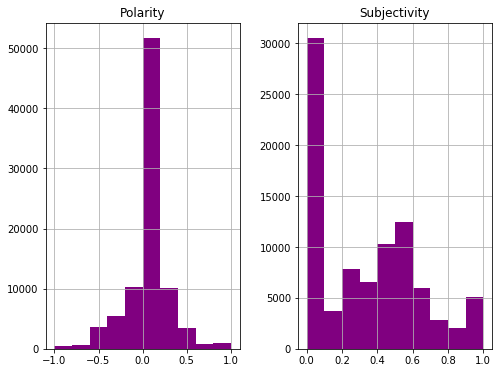

In [202]:
fig, ax = plt.subplots(figsize=(8, 6))
tweetsentp.hist(
             ax=ax,
             color="purple")
plt.show()


### assign positive, neutral, negative

In [203]:
def getTextAnalysis(tweet):
    if tweet < 0:
        return "Negative"
    elif tweet == 0:
        return "Neutral"
    else:
        return "Positive"

In [204]:
tweetsentp['Score'] = tweetsentp['Polarity'].apply(getTextAnalysis)


In [205]:
tweetsentp.head()

tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
9        covid19 officially denounces white supremacy       US  02-Oct-2020   
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020   

    Subjectivity  Polarity     Score  
0       0.808333  0.466667  Positive  
1       0.333333  0.250000  Positive  
8       0.300000  0.200000  Positive  
9       0.000000  0.000000   Neutral  
11      0.000000  0.000000   Neutral

In [76]:
tweetsentp[tweetsentp.Score == 'Neutral'].count()  

tweet           34328
location        34328
created         34328
Subjectivity    34328
Polarity        34328
Score           34328
dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



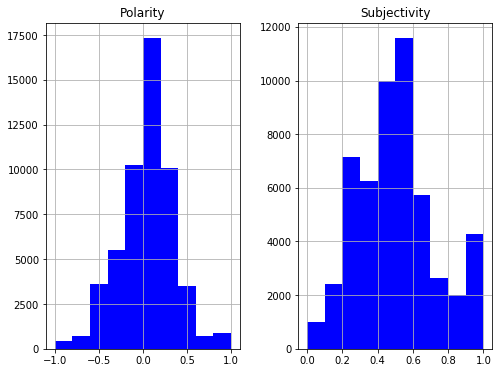

In [206]:
fig, ax = plt.subplots(figsize=(8, 6))

tweetremove.hist(
             ax=ax,
             color="blue")

plt.show()


In [207]:
t1=tweetsentp.copy()

In [208]:
t1.head()

tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
9        covid19 officially denounces white supremacy       US  02-Oct-2020   
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020   

    Subjectivity  Polarity     Score  
0       0.808333  0.466667  Positive  
1       0.333333  0.250000  Positive  
8       0.300000  0.200000  Positive  
9       0.000000  0.000000   Neutral  
11      0.000000  0.000000   Neutral

In [209]:
t1['Positive'] = [ 1 if x =='Positive' else 0 for x in t1['Score']] 
t1['Neutral'] = [ 1 if x =='Neutral' else 0 for x in t1['Score']] 
t1['Negative'] = [ 1 if x =='Negative' else 0 for x in t1['Score']] 

In [210]:
t1.head()


tweet location      created  \
0   well looking like amy coney barrett announceme...       US  02-Oct-2020   
1   wapo deleted tweet wa sent hour trump announce...       US  02-Oct-2020   
8   tree4justice real thing nurse friend seen elde...       US  02-Oct-2020   
9        covid19 officially denounces white supremacy       US  02-Oct-2020   
11        statement president trump covid19 diagnosis   CANADA  02-Oct-2020   

    Subjectivity  Polarity     Score  Positive  Neutral  Negative  
0       0.808333  0.466667  Positive         1        0         0  
1       0.333333  0.250000  Positive         1        0         0  
8       0.300000  0.200000  Positive         1        0         0  
9       0.000000  0.000000   Neutral         0        1         0  
11      0.000000  0.000000   Neutral         0        1         0

In [211]:
t2=t1.groupby(['location'])['Positive','Neutral','Negative'].sum()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [212]:
t2.head()

Positive  Neutral  Negative
location                              
ARGENTINA        24       47        11
AUSTRALIA       745      606       360
BELGIUM          24       21         9
BRAZIL           38       81        29
CANADA         1864     1676       961

### remove europe and north america

In [213]:
index_names = t2.loc[['EUROPE','NORTH AMERICA']].index
t2.drop(index_names, inplace = True) 
t2.head()


Positive  Neutral  Negative
location                              
ARGENTINA        24       47        11
AUSTRALIA       745      606       360
BELGIUM          24       21         9
BRAZIL           38       81        29
CANADA         1864     1676       961

In [214]:
t2['Sum'] = t2.sum(axis=1) 
t2['Positiverates'] = t2['Positive']/t2['Sum']
t2['Neutralrates'] = t2['Neutral']/t2['Sum']
t2['Negativerates'] = t2['Negative']/t2['Sum']

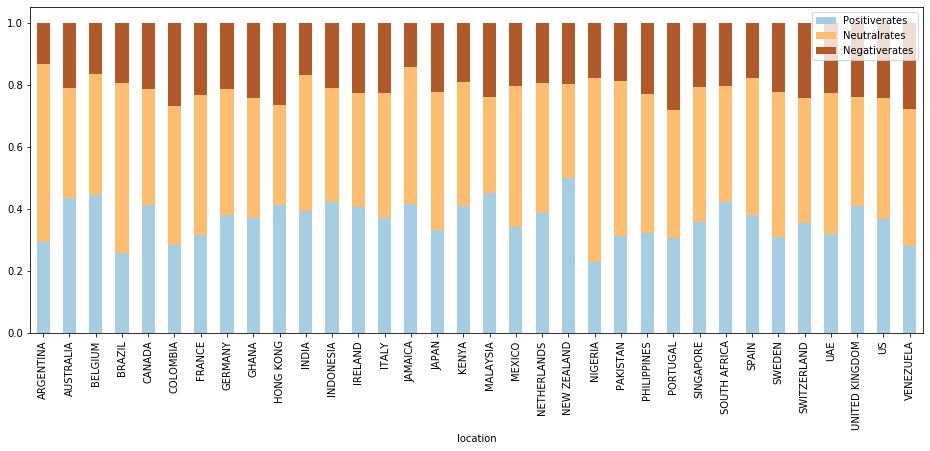

In [215]:
ax = t2[['Positiverates','Neutralrates','Negativerates']].plot.bar(stacked=True,colormap='Paired')


In [216]:
tweetsentp.groupby('location').describe().head()

Subjectivity                                                         \
                 count      mean       std  min  25%       50%       75%  max   
location                                                                        
ARGENTINA         82.0  0.190566  0.266102  0.0  0.0  0.000000  0.393750  0.9   
AUSTRALIA       1711.0  0.357927  0.294165  0.0  0.0  0.379167  0.544444  1.0   
BELGIUM           54.0  0.359264  0.318894  0.0  0.0  0.376136  0.567614  1.0   
BRAZIL           148.0  0.268205  0.319905  0.0  0.0  0.083333  0.509386  1.0   
CANADA          4501.0  0.342135  0.296881  0.0  0.0  0.366667  0.545455  1.0   

          Polarity                                                        
             count      mean       std     min  25%  50%       75%   max  
location                                                                  
ARGENTINA     82.0  0.050731  0.168530 -0.3000  0.0  0.0  0.075000  0.75  
AUSTRALIA   1711.0  0.061293  0.226546 -1.0000  0.0  0.0  0.160000  1.00  
BELGIUM       54.0  0.119089  0.246965 -0.4375  0.0  0.0  0.227273  1.00  
BRAZIL       148.0  0.008556  0.231721 -1.0000  0.0  0.0  0.022727  0.80  
CANADA      4501.0  0.042758  0.236646 -1.0000  0.0  0.0  0.136364  1.00